In [31]:
# importação das bibliotecas

import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [32]:
# definição das variáveis linguísticas de entrada e saída

# antecedentes (entradas) oq eu apresento ao sistema
# consequentes (saídas) a resposta do sistema

# EX. (0, 11, 1): 0 é o valor mínimo, 11 é o valor máximo e 1 é o passo 

comida = ctrl.Antecedent(np.arange(0, 11, 1), 'comida') #qualidade da comida
servico = ctrl.Antecedent(np.arange(0, 11, 1), 'servico') #qualidade do serviço
gorjeta = ctrl.Consequent(np.arange(0, 26, 1), 'gorjeta') #valor da gorjeta

In [33]:
# definição do numero de conjuntos difusos para cada variável linguística

# trimf: triangular membership function
# universe: conjunto de valores que a variável linguística pode assumir

comida['ruim'] = fuzz.trimf(comida.universe, [0, 0, 5]) #conjunto difuso ruim
comida['aceitavel'] = fuzz.trimf(comida.universe, [0, 5, 10]) #conjunto difuso aceitável
comida['otima'] = fuzz.trimf(comida.universe, [5, 10, 10]) #conjunto difuso ótima

# no caso do serviço, a automf cria automaticamente os conjuntos difusos
#servico.automf(3)
# gera os conjuntos difusos: poor, average, good

servico['ruim'] = fuzz.trimf(servico.universe, [0, 0, 5]) #conjunto difuso ruim
servico['aceitavel'] = fuzz.trimf(servico.universe, [0, 5, 10]) #conjunto difuso aceitável
servico['otimo'] = fuzz.trimf(servico.universe, [5, 10, 10]) #conjunto difuso ótimo


In [34]:
# parametriza os conjuntos difusos de saída
gorjeta['baixa'] = fuzz.trimf(gorjeta.universe, [0, 0, 13])
gorjeta['media'] = fuzz.trimf(gorjeta.universe, [0, 13, 25])
gorjeta['alta'] = fuzz.trimf(gorjeta.universe, [13, 25, 25])

c:\Users\rafin\AppData\Local\Programs\Python\Python310\lib\site-packages\skfuzzy\control\term.py:74: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


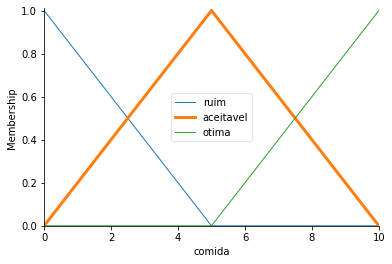

In [35]:
comida['aceitavel'].view()

c:\Users\rafin\AppData\Local\Programs\Python\Python310\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


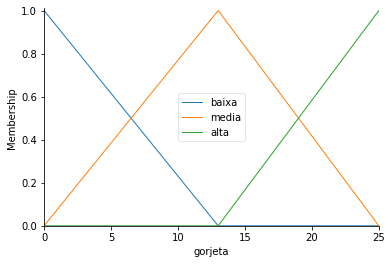

In [36]:
gorjeta.view()

In [37]:
# definindo as regras heurísticas para o sistema

r1 = ctrl.Rule(comida['ruim'] or servico['ruim'], gorjeta['baixa'])
r2 = ctrl.Rule(comida['otima'] or servico['otimo'], gorjeta['alta'])
r3 = ctrl.Rule(comida['aceitavel'] and servico['aceitavel'], gorjeta['media'])
r4 = ctrl.Rule(comida['ruim'] and servico['otimo'], gorjeta['media'])

Valor da gorjeta: 11.05


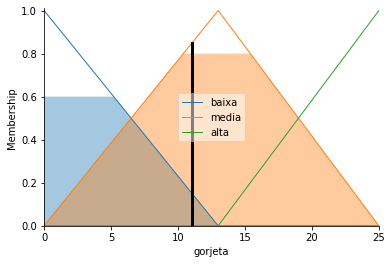

In [38]:
# processo de inferência
# (1) fuzzyficação: transforma os valores de entrada em valores difusos
# (2) aplicação das regras: aplica as regras heurísticas com concordância u(x) > 0
# (3) agregação/composição: combina os resultados das regras
# (4) defuzzificação: transforma o resultado da agregação em um valor concreto

criterios = ctrl.ControlSystem([r1, r2, r3, r4])
resultado = ctrl.ControlSystemSimulation(criterios)
comida_ = float(input('Qualidade da comida: '))
servico_ = float(input('Qualidade do serviço: '))

resultado.input['comida'] = comida_
resultado.input['servico'] = servico_

resultado.compute()

print('Valor da gorjeta: {}'.format(round(resultado.output['gorjeta'], 2)))

gorjeta.view(sim=resultado)